In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [4]:
df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [5]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [6]:
df.drop('id',axis=1,inplace=True)

# Basic EDA

In [7]:
df.Sex.value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

Text(0.5, 1.0, 'No. of crabs as per gender')

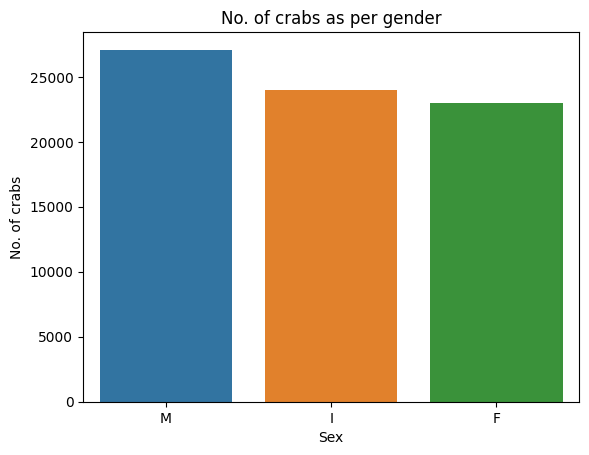

In [8]:
sns.barplot(data=df,x= df.Sex.value_counts().index,y=df.Sex.value_counts())
plt.xlabel('Sex')
plt.ylabel('No. of crabs')
plt.title('No. of crabs as per gender')

<Axes: >

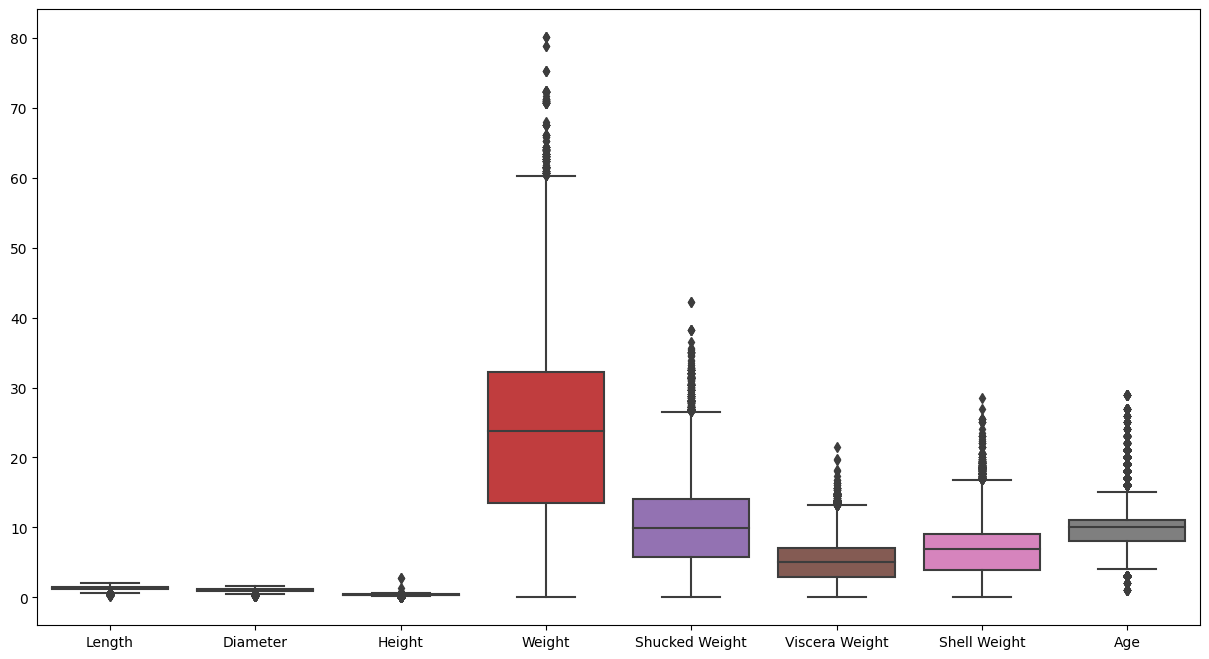

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

<Axes: xlabel='Length', ylabel='Diameter'>

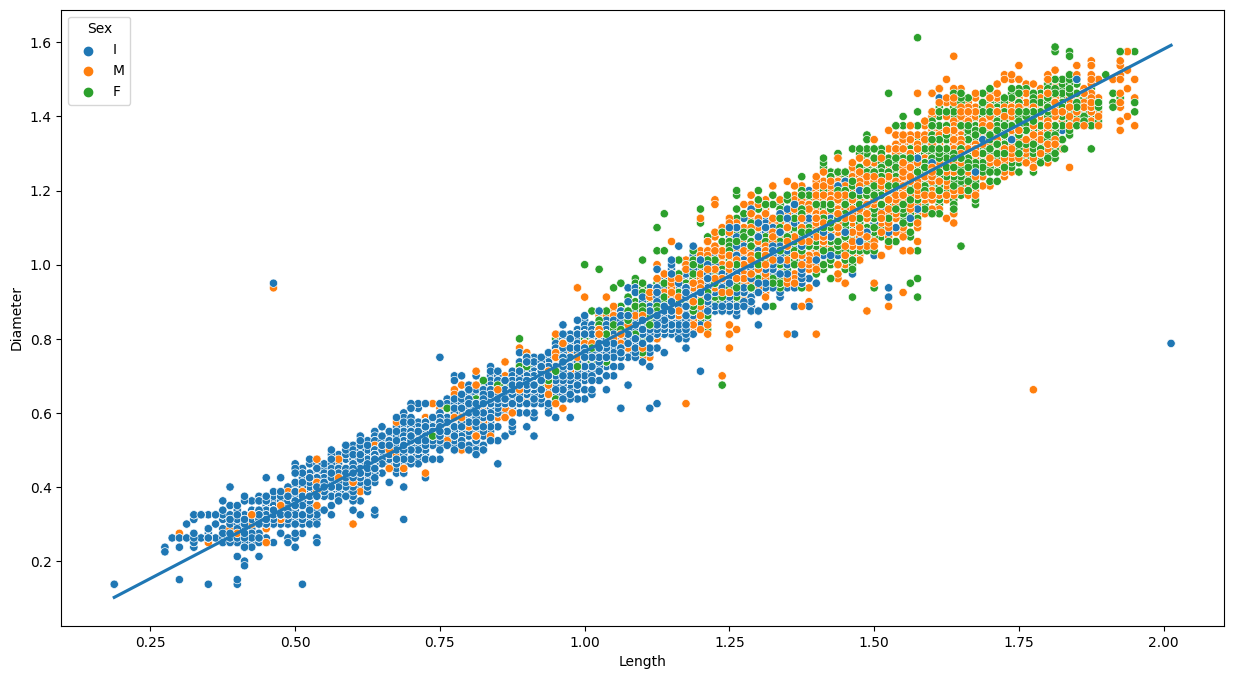

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Length',y='Diameter',hue='Sex')
sns.regplot(data=df, x='Length', y='Diameter', scatter=False)

<Axes: >

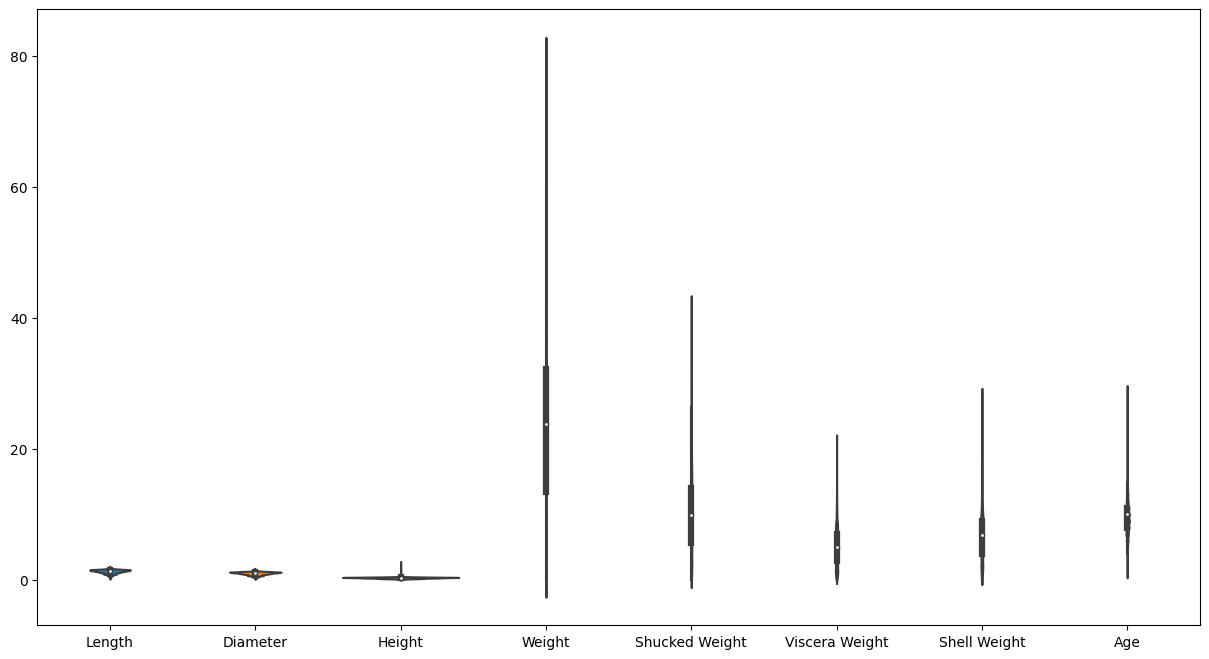

In [11]:
plt.figure(figsize=(15,8))
sns.violinplot(data=df)

In [12]:
def replace_outliers_with_mean(df, columns, multiplier=1.5):
    """
    Replace outliers in a dataframe with the mean value of the respective column.

    Args:
        dataframe (pd.DataFrame): The dataframe containing the data.
        columns (list): List of column names to process for outlier replacement.
        multiplier (float): The multiplier for determining the outlier cutoff.
            Default is 1.5, which is the common choice for the IQR method.

    Returns:
        pd.DataFrame: The dataframe with outliers replaced by the mean value.
    """

    # Iterate over the specified columns
    for column in columns:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        iqr = q3 - q1

        # Calculate the lower and upper bounds for outlier detection
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr

        # Replace outliers that are outside the bounds with the mean value
        outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        df[column] = np.where(outliers_mask, df[column].mean(), df[column])

    return df

In [13]:
columns_to_process = ['Length', 'Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight','Age']
replace_outliers_with_mean(df,columns_to_process)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10.0
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6.0
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10.0
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8.0


<Axes: >

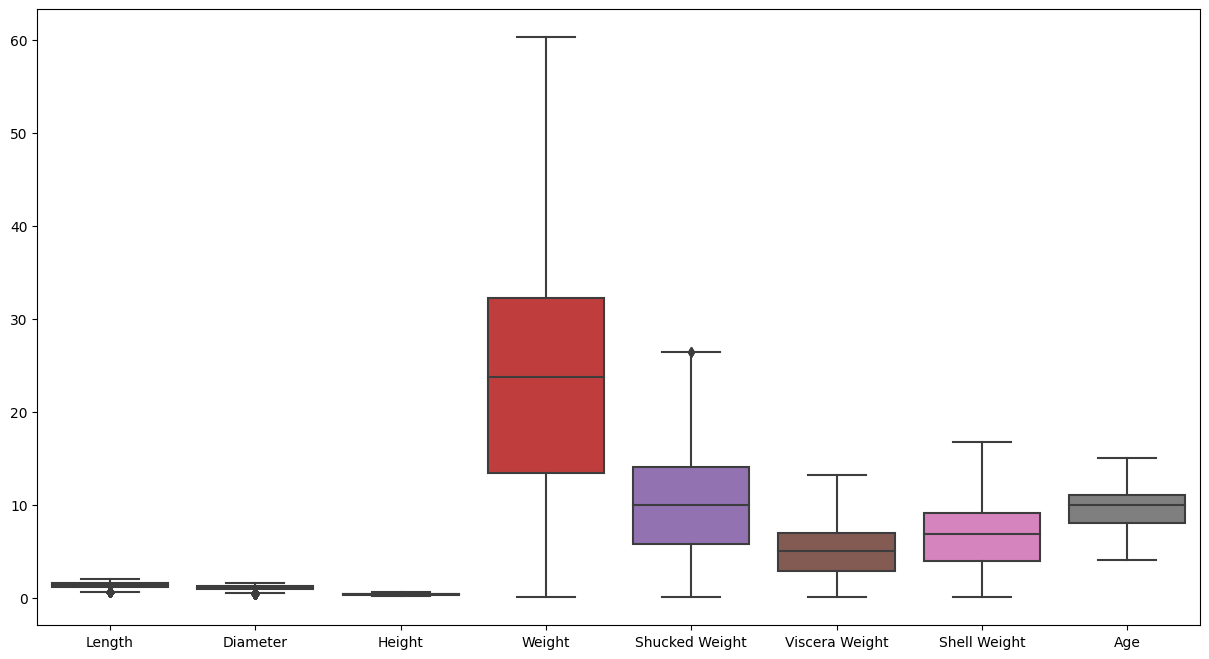

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

<Axes: xlabel='Height', ylabel='Weight'>

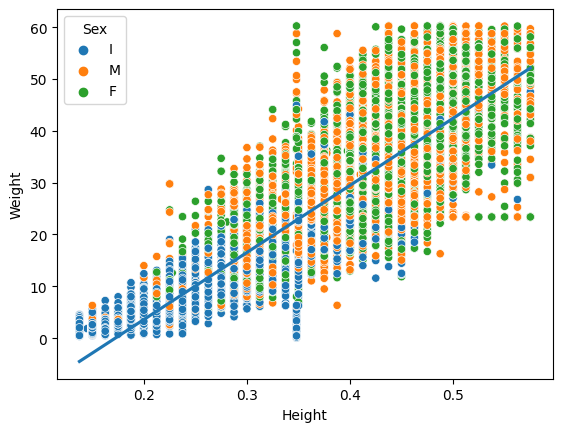

In [15]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Sex')
sns.regplot(data=df, x='Height', y='Weight', scatter=False)

<Axes: xlabel='Shucked Weight', ylabel='Viscera Weight'>

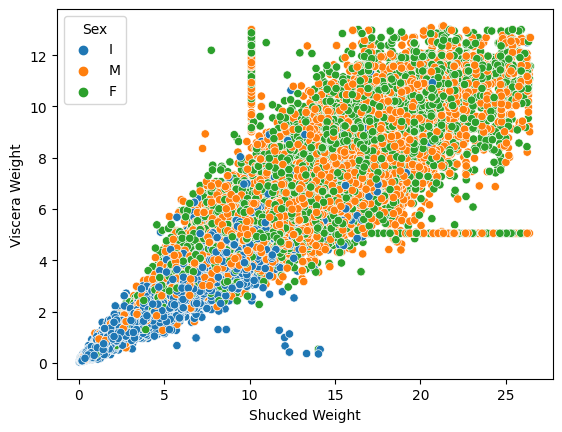

In [16]:
sns.scatterplot(data=df,x= 'Shucked Weight',y='Viscera Weight',hue='Sex')

In [17]:
df.head(2)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.525,1.175,0.375,28.973189,12.728926,6.647958,8.348928,9.0
1,I,1.100,0.825,0.275,10.418441,4.521745,2.324659,3.401940,8.0


In [18]:
pearson_matrix = df.corr()
spearman_matrix = df.corr(method='spearman')

C:\Users\deepa\AppData\Local\Temp\ipykernel_13928\2555276259.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_matrix = df.corr()
C:\Users\deepa\AppData\Local\Temp\ipykernel_13928\2555276259.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_matrix = df.corr(method='spearman')


<Axes: >

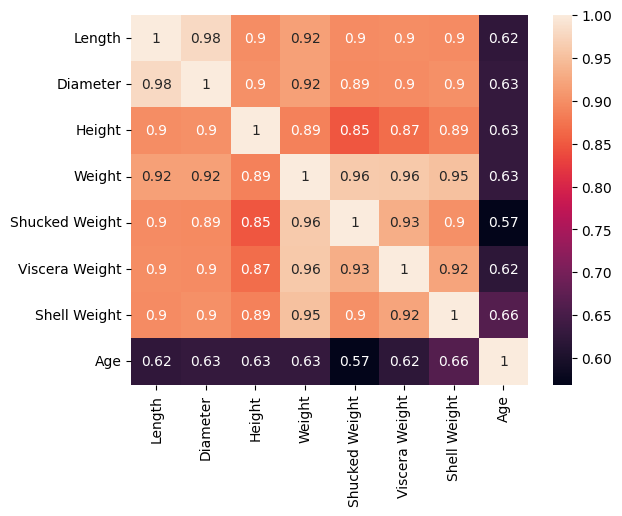

In [19]:
sns.heatmap(data=pearson_matrix,annot=True)

<Axes: >

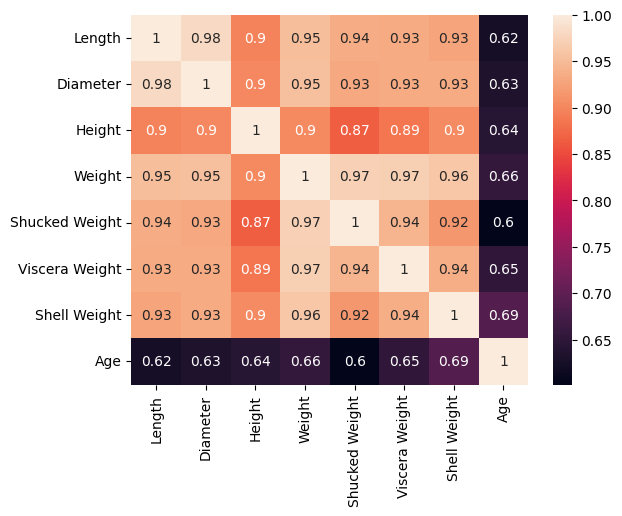

In [20]:
sns.heatmap(data=spearman_matrix,annot=True)

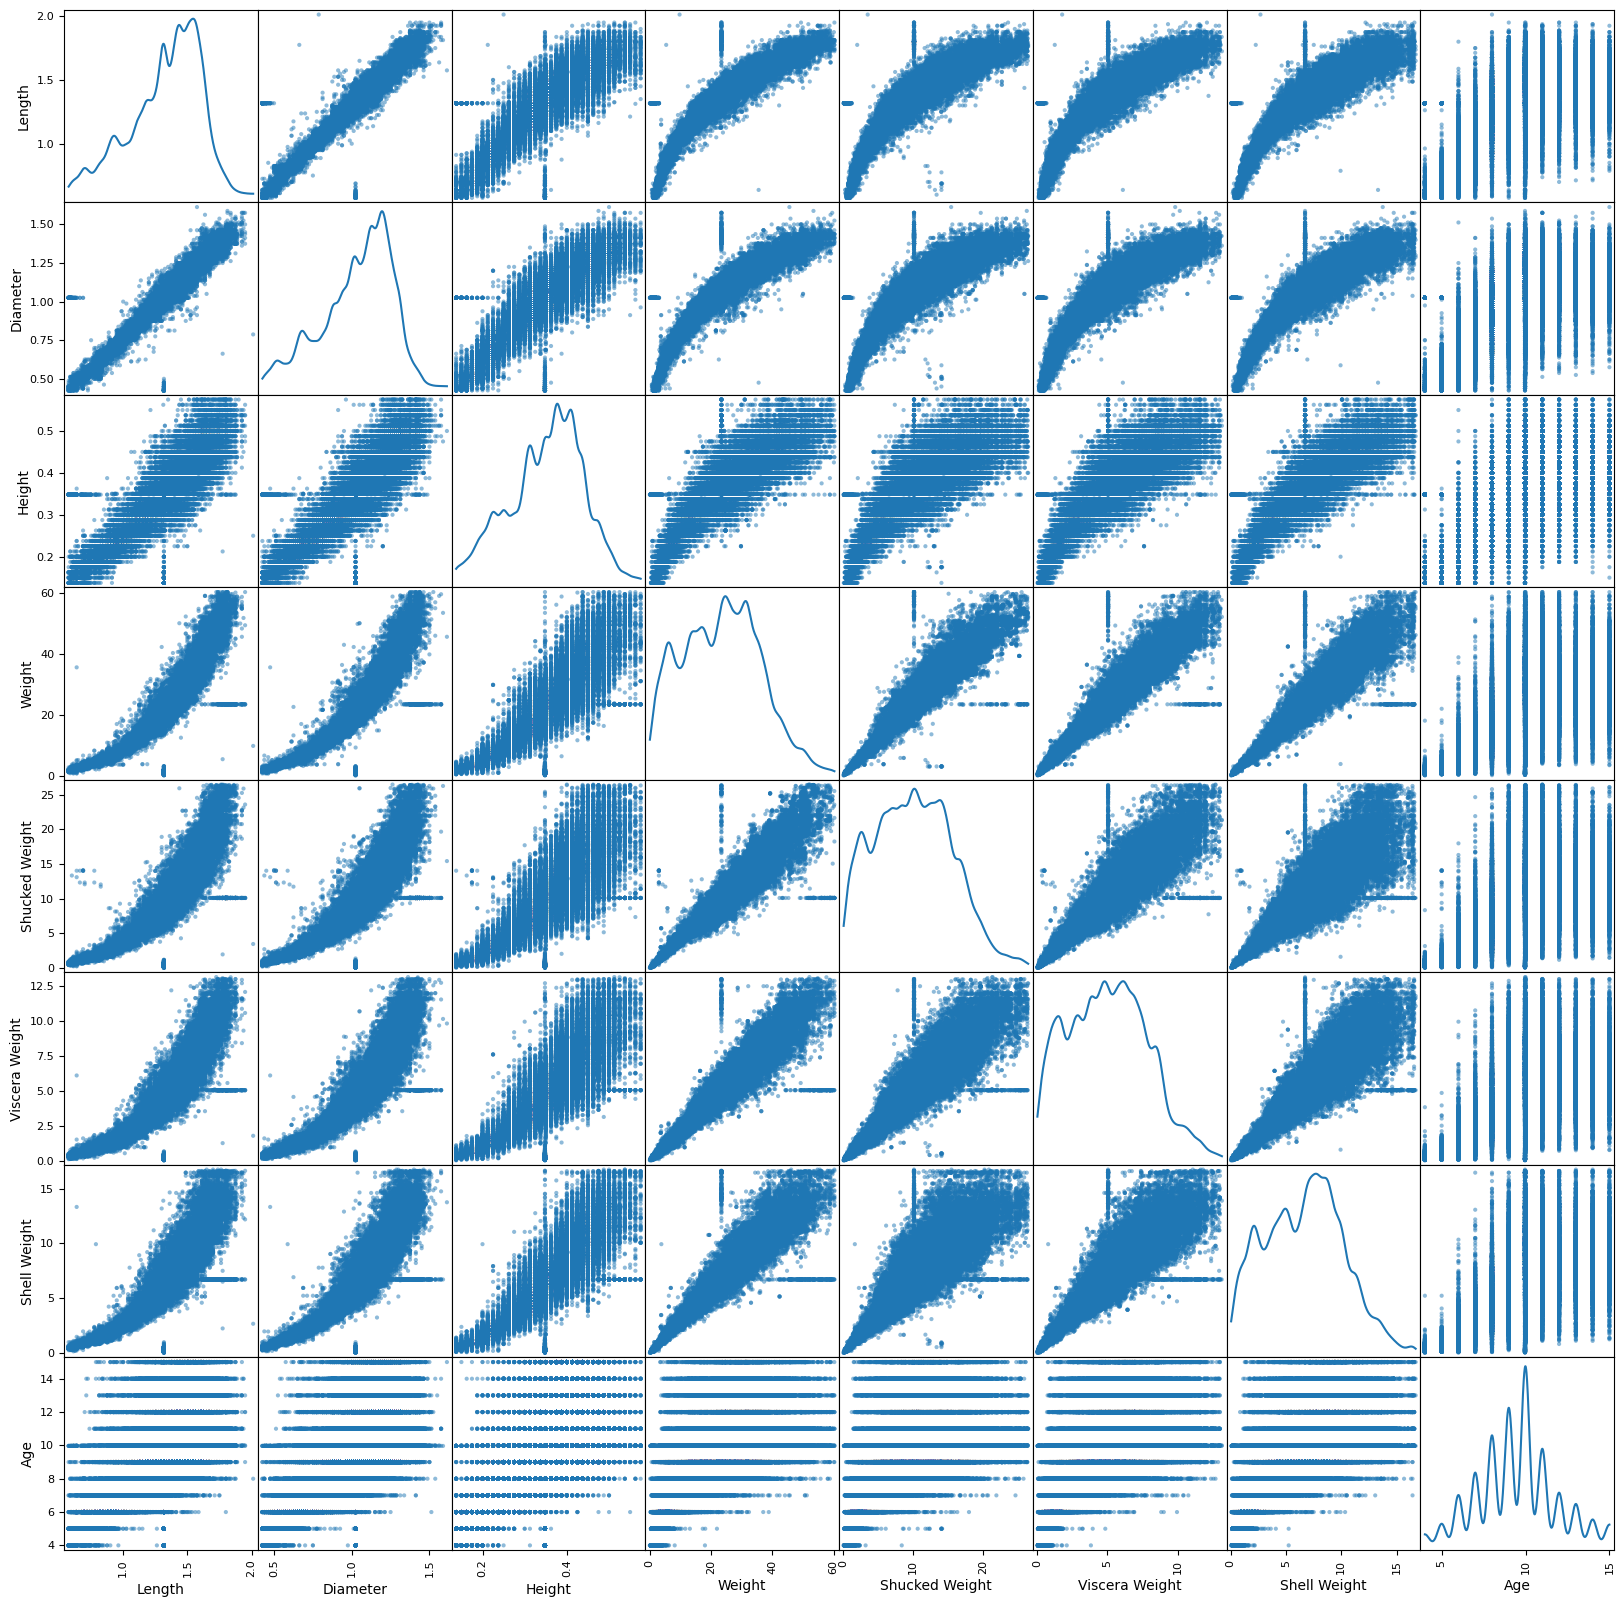

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20, 20), diagonal='kde')
plt.show()

In [22]:
# we will apply one hot encoding
df=pd.get_dummies(columns=["Sex"],data=df,dtype="float")

In [23]:
df.head(2)

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.525,1.175,0.375,28.973189,12.728926,6.647958,8.348928,9.0,0.0,1.0,0.0
1,1.100,0.825,0.275,10.418441,4.521745,2.324659,3.401940,8.0,0.0,1.0,0.0


In [24]:
x = df.drop('Age',axis=1)
y = df.Age

In [25]:
x.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,0.0,1.0,0.0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0.0,1.0,0.0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0.0,0.0,1.0
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1.0,0.0,0.0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0.0,1.0,0.0


In [26]:
y.head()

0     9.0
1     8.0
2     9.0
3    11.0
4     8.0
Name: Age, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [28]:
x.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,0.728146,0.632252,0.272411,0.461251,0.495351,0.593620,0.485558,-0.671427,1.446028,-0.759381
1,-0.874847,-0.962880,-0.903919,-1.033185,-1.006072,-0.986703,-0.937463,-0.671427,1.446028,-0.759381
2,0.209531,0.347407,0.272411,0.123319,0.241224,0.194653,0.000344,-0.671427,-0.691550,1.316861
3,1.388203,1.714662,1.742823,2.207996,1.890456,2.181466,2.397870,1.489365,-0.691550,-0.759381
4,-0.309085,-0.108345,-0.168713,0.003445,0.357915,-0.188769,-0.203527,-0.671427,1.446028,-0.759381


In [29]:
# splitting the data into training testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=100)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(59240, 10)
(14811, 10)
(59240,)
(14811,)


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression(fit_intercept=True).fit(x_train,y_train)

In [33]:
reg.score(x_train,y_train)

0.495871523369379

In [34]:
reg.score(x_test,y_test)

0.5060499700570233

In [35]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error

# List of models to include
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Polynomial Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Bayesian Linear Regression': LinearRegression(),  # Placeholder for Bayesian regression
}

# Placeholder for Bayesian regression code

# Create dictionaries to store the model accuracies
model_r2_scores = {}
model_mae_scores = {}

# Iterate over each model
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict the target variable
    y_pred = model.predict(x_test)

    # Calculate the accuracy scores (R-squared and MAE)
    r2_score_value = r2_score(y_test, y_pred)
    mae_score = mean_absolute_error(y_test, y_pred)

    # Store the accuracy scores in the dictionaries
    model_r2_scores[model_name] = r2_score_value
    model_mae_scores[model_name] = mae_score

# Print the model accuracies
for model_name, r2_score_value in model_r2_scores.items():
    mae_score = model_mae_scores[model_name]
    print(f'{model_name}: R-squared: {r2_score_value}, MAE: {mae_score}')

Ridge Regression: R-squared: 0.5060715435224372, MAE: 1.216415198366147
Lasso Regression: R-squared: 0.25329933962535167, MAE: 1.5238240063150335
Elastic Net Regression: R-squared: 0.3961211219477019, MAE: 1.3551562437916769
Polynomial Regression: R-squared: 0.5060499700570233, MAE: 1.216643985934822
Support Vector Regression: R-squared: 0.5584624882917603, MAE: 1.1005917056354246
Bayesian Linear Regression: R-squared: 0.5060499700570233, MAE: 1.216643985934822


In [36]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

# Create an SVR model
svr_model = SVR()

# Fit the SVR model on the training data
svr_model.fit(x_train, y_train)

# Predict the target variable using SVR
y_pred_svr = svr_model.predict(x_test)

# Calculate the accuracy scores (R-squared and MAE) for SVR
r2_score_svr = r2_score(y_test, y_pred_svr)
mae_score_svr = mean_absolute_error(y_test, y_pred_svr)

# Print the model accuracy for SVR
print(f'Support Vector Regression: R-squared: {r2_score_svr}, MAE: {mae_score_svr}')


Support Vector Regression: R-squared: 0.5584624882917603, MAE: 1.1005917056354246


In [41]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [42]:
test_data.drop('id',inplace=True,axis=1)

In [43]:
# we will apply one hot encoding
test_data=pd.get_dummies(columns=["Sex"],data=test_data,dtype="float")

In [47]:
top_10 = test_data.head(10)
top_10

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0.0,1.0,0.0
1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,0.0,1.0,0.0
2,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1.0,0.0,0.0
3,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1.0,0.0,0.0
4,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0.0,1.0,0.0
5,1.4250,1.1125,0.3500,24.834162,8.731646,5.712424,8.079607,0.0,0.0,1.0
6,1.7125,1.3250,0.4500,46.677452,21.233776,11.963489,11.368149,0.0,0.0,1.0
7,1.1750,0.8875,0.3000,13.933779,5.698250,2.990872,3.940580,0.0,1.0,0.0
8,1.3125,1.0625,0.2875,23.586784,8.164656,5.627376,8.462326,1.0,0.0,0.0
9,1.4250,1.0500,0.3125,17.789311,7.101550,4.606794,5.528153,1.0,0.0,0.0


In [48]:
# Assuming you have a trained SVR model named svr_model

# Predict the target variable using SVR
y_pred_svr = svr_model.predict(top_10)

# Print the predicted values
print(y_pred_svr)

[9.07281794 9.01422273 9.0142233  9.01422271 9.01446546 9.01422271
 9.01422271 9.01422506 9.01422271 9.01422271]
